In [3]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Setup environment and update dictionary
!./setup_project.sh

# Set options
pd.set_option("display.max_rows", 200)

Rebel manifesto dictionary updated.


In [4]:
# Load rebel manifesto data
manifesto_dictionary = pd.read_pickle('../data/manifesto_dictionary.pkl')
manifesto_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6667 entries, 902 to 6666
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        6667 non-null   object        
 1   group          6667 non-null   object        
 2   date           6229 non-null   datetime64[ns]
 3   year           6229 non-null   period[A-DEC] 
 4   source_type    6667 non-null   object        
 5   document_type  6659 non-null   object        
 6   description    6622 non-null   object        
 7   author         85 non-null     object        
 8   language       6667 non-null   object        
 9   file_path      6667 non-null   object        
 10  file_name      6667 non-null   object        
 11  file_type      6667 non-null   object        
dtypes: datetime64[ns](1), object(10), period[A-DEC](1)
memory usage: 677.1+ KB


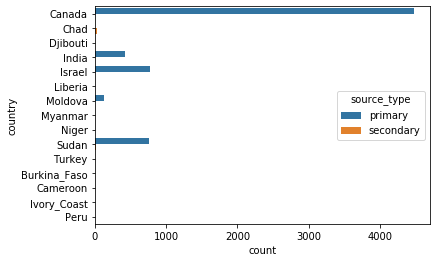

In [5]:
# Exploratory plots
blue = sns.color_palette('tab10')[0]
orange = sns.color_palette('tab10')[1]

# Sources by country
sns.countplot(y='country', hue='source_type', data=manifesto_dictionary)

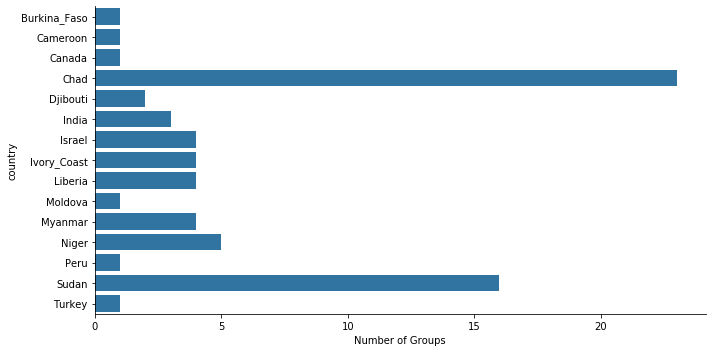

In [6]:
# Number of groups by country
cgs_counts = manifesto_dictionary.groupby(['country'])['group'].nunique()
cgs_counts = cgs_counts.to_frame(name='Number of Groups').reset_index()
sns.catplot(x='Number of Groups', y='country', data=cgs_counts,
            kind='bar', color=blue, aspect=2)

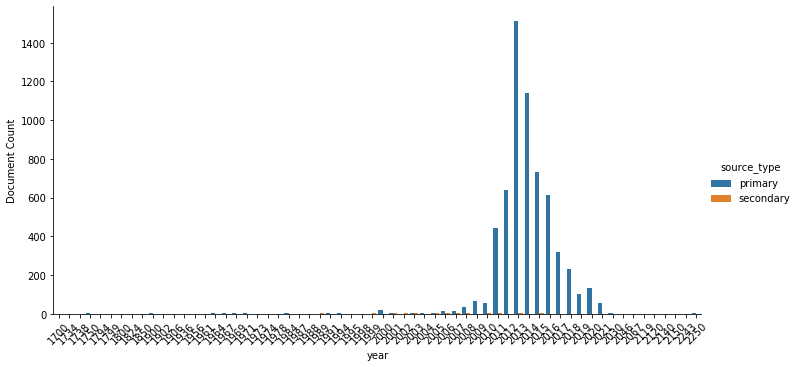

In [7]:
sy_counts = manifesto_dictionary.groupby(['year'])['source_type'].value_counts()
sy_counts = sy_counts.to_frame(name='Document Count').reset_index()
g = sns.catplot(x='year', y='Document Count', hue='source_type', 
                kind='bar', data=sy_counts, aspect=2)
g.set_xticklabels(rotation=45)

In [8]:
# Examine language and primary counts for subset of groups
is_primary = manifesto_dictionary['source_type'] == 'primary'
manifesto_dictionary[is_primary]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
902,Canada,PQ,2013-11-27,2013,primary,News,ReportOfQubecTrainDeLEstBulletinDofLaBelleGest...,NaN,EN,Canada/PQ/primary/ReportOfQubecTrainDeLEstBull...,ReportOfQubecTrainDeLEstBulletinDofLaBelleGest...,txt
903,Canada,PQ,2016-08-21,2016,primary,News,BravoNosAthltes,NaN,EN,Canada/PQ/primary/BravoNosAthltes_News_2016-08...,BravoNosAthltes_News_2016-08-21.txt,txt
904,Canada,PQ,2013-11-15,2013,primary,News,AvisDIntentionDeClassementLeMinistreMakaKottoA...,NaN,EN,Canada/PQ/primary/AvisDIntentionDeClassementLe...,AvisDIntentionDeClassementLeMinistreMakaKottoA...,txt
905,Canada,PQ,2018-09-18,2018,primary,News,LePartiQubcoisComplteraLeRseauDeServicesDeGard...,NaN,EN,Canada/PQ/primary/LePartiQubcoisComplteraLeRse...,LePartiQubcoisComplteraLeRseauDeServicesDeGard...,txt
906,Canada,PQ,2015-09-16,2015,primary,News,BientreAnimalLeProjectDeLawDuMinisterPierrePar...,NaN,EN,Canada/PQ/primary/BientreAnimalLeProjectDeLawD...,BientreAnimalLeProjectDeLawDuMinisterPierrePar...,txt
...,...,...,...,...,...,...,...,...,...,...,...,...
6567,Turkey,PKK,NaT,NaT,primary,chronology,Chronology,NaN,TR,Turkey/PKK/primary/Chronology_chronology_[TR].pdf,Chronology_chronology_[TR].pdf,pdf
6568,Turkey,PKK,NaT,NaT,primary,manifesto,Manifesto,NaN,TR,Turkey/PKK/primary/Manifesto_manifesto_[TR].pdf,Manifesto_manifesto_[TR].pdf,pdf
6569,Turkey,PKK,NaT,NaT,primary,article,4.1,NaN,TR,Turkey/PKK/primary/4.1_article_[TR].pdf,4.1_article_[TR].pdf,pdf
6570,Turkey,PKK,1991-05-15,1991,primary,article,Kongre,NaN,TR,Turkey/PKK/primary/Kongre_article_[TR]_1991-05...,Kongre_article_[TR]_1991-05-15.pdf,pdf


In [9]:
groups = manifesto_dictionary['group'].isin(['CPI-Maoist', 'PFLP', 'PMR', 'JEM', 'PQ'])
manifesto_dictionary[is_primary & groups]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
902,Canada,PQ,2013-11-27,2013,primary,News,ReportOfQubecTrainDeLEstBulletinDofLaBelleGest...,NaN,EN,Canada/PQ/primary/ReportOfQubecTrainDeLEstBull...,ReportOfQubecTrainDeLEstBulletinDofLaBelleGest...,txt
903,Canada,PQ,2016-08-21,2016,primary,News,BravoNosAthltes,NaN,EN,Canada/PQ/primary/BravoNosAthltes_News_2016-08...,BravoNosAthltes_News_2016-08-21.txt,txt
904,Canada,PQ,2013-11-15,2013,primary,News,AvisDIntentionDeClassementLeMinistreMakaKottoA...,NaN,EN,Canada/PQ/primary/AvisDIntentionDeClassementLe...,AvisDIntentionDeClassementLeMinistreMakaKottoA...,txt
905,Canada,PQ,2018-09-18,2018,primary,News,LePartiQubcoisComplteraLeRseauDeServicesDeGard...,NaN,EN,Canada/PQ/primary/LePartiQubcoisComplteraLeRse...,LePartiQubcoisComplteraLeRseauDeServicesDeGard...,txt
906,Canada,PQ,2015-09-16,2015,primary,News,BientreAnimalLeProjectDeLawDuMinisterPierrePar...,NaN,EN,Canada/PQ/primary/BientreAnimalLeProjectDeLawD...,BientreAnimalLeProjectDeLawDuMinisterPierrePar...,txt
...,...,...,...,...,...,...,...,...,...,...,...,...
6552,Sudan,JEM,2018-01-01,2018,primary,statement,AccountInventoryForTheSudanSThirdRevolutionTha...,NaN,EN,Sudan/JEM/primary/AccountInventoryForTheSudanS...,AccountInventoryForTheSudanSThirdRevolutionTha...,txt
6553,Sudan,JEM,2020-05-01,2020,primary,statement,SouthSudanMediatorCondemnsAllegationsOfTerrori...,NaN,EN,Sudan/JEM/primary/SouthSudanMediatorCondemnsAl...,SouthSudanMediatorCondemnsAllegationsOfTerrori...,txt
6554,Sudan,JEM,2016-09-02,2016,primary,statement,FailureOfIslamicState,NaN,EN,Sudan/JEM/primary/FailureOfIslamicState_statem...,FailureOfIslamicState_statement_2016-09-02.txt,txt
6555,Sudan,JEM,2018-10-01,2018,primary,statement,TalesOfTheTombstonesTheDiscriminationAgainstSu...,NaN,EN,Sudan/JEM/primary/TalesOfTheTombstonesTheDiscr...,TalesOfTheTombstonesTheDiscriminationAgainstSu...,txt


In [23]:
manifesto_dictionary.loc[manifesto_dictionary.country == 'Canada','document_type'].value_counts()

News    4470
Name: document_type, dtype: int64